# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #city_response=citipy.nearest_city(lat_lng[0], lat_lng[1])
    #pprint(city_response)
    #city=city_response.city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        print(city) 
# Print the city count to confirm sufficient count
len(cities)

gazion
puerto ayora
new norfolk
severo-kurilsk
kaitangata
saskylakh
topolobampo
portland
dubai
namtsy
jamestown
korla
souillac
naze
general roca
kruisfontein
trinidad
caravelas
busselton
jalu
kuandian
ushuaia
punta arenas
tiksi
hobart
barentsburg
airai
prachuap khiri khan
barrow
butaritari
hurghada
taolanaro
illoqqortoormiut
nome
spassk-ryazanskiy
mar del plata
bozhou
khatanga
clyde river
beian
hilo
sucua
tulare
sur
tura
quatre cocos
mataura
mende
anadyr
avarua
saint george
tandalti
lebu
albany
georgetown
tuktoyaktuk
victoria
sao filipe
port alfred
nouadhibou
lorengau
kodiak
ust-kuyga
pevek
balakhninskiy
dikson
camden
faanui
saleaula
grand baie
rikitea
zhicheng
mokrousovo
kuche
kapaa
baruun-urt
ostrovnoy
ahuimanu
kpandae
ribeira grande
bakel
nola
coruripe
yellowknife
bluff
ayagoz
sao gabriel da cachoeira
bethel
russell
port-gentil
sitka
ancud
santiago del estero
cayenne
solovetskiy
malwan
fort nelson
qaanaaq
kepno
seoul
constitucion
pierre
zhigansk
kalianget
east london
dalby
serenje
c

594

In [3]:
#print (cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#print (api_key)

In [5]:
#api_key = api_keys.api_key

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={api_key}&units={units}&q="
#https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=YOUR_API_KEY 
#print (query_url)

In [6]:
#Include a print log of each city (with the city number and city name).
#try:
columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
weather_df=pd.DataFrame(columns=columns)
x=0
for city in cities:
    x=x+1
    url=query_url + city
    #print(url)
    #response=requests.get(url).json()
    #pprint(response)
    response= requests.get(url)
    weather_response= response.json()
    #pprint(weather_response)
    try:
        response=requests.get(url).json()
        weather_df.loc[x, "City"] = weather_response['name']
        weather_df.loc[x,'Cloudiness']=weather_response['clouds']['all']
        weather_df.loc[x,'Country']=weather_response['clouds']['all']
        weather_df.loc[x,'Date']=weather_response['dt']
        weather_df.loc[x,'Humidity']=weather_response['main']['humidity']
        weather_df.loc[x,'Lat']=weather_response['coord']['lat']
        weather_df.loc[x,'Lng']=weather_response['coord']['lon']
        weather_df.loc[x,'Max Temp']=weather_response['main']['temp_max']
        weather_df.loc[x,'Wind Speed']=weather_response['wind']['speed']
        print("City Number: " + str(x)+" City: "+city)

    except:
        print ("City Number: " + str(x) +" City: " + city+ " not found" )
        
#print("City Number: " + str(x)+" City : "+weather_df["City"])
#print(weather_df.head())


City Number: 1 City: gazion not found
City Number: 2 City: puerto ayora
City Number: 3 City: new norfolk
City Number: 4 City: severo-kurilsk
City Number: 5 City: kaitangata
City Number: 6 City: saskylakh
City Number: 7 City: topolobampo
City Number: 8 City: portland
City Number: 9 City: dubai
City Number: 10 City: namtsy
City Number: 11 City: jamestown
City Number: 12 City: korla not found
City Number: 13 City: souillac
City Number: 14 City: naze
City Number: 15 City: general roca
City Number: 16 City: kruisfontein
City Number: 17 City: trinidad
City Number: 18 City: caravelas
City Number: 19 City: busselton
City Number: 20 City: jalu
City Number: 21 City: kuandian
City Number: 22 City: ushuaia
City Number: 23 City: punta arenas
City Number: 24 City: tiksi
City Number: 25 City: hobart
City Number: 26 City: barentsburg not found
City Number: 27 City: airai
City Number: 28 City: prachuap khiri khan
City Number: 29 City: barrow
City Number: 30 City: butaritari
City Number: 31 City: hurgha

City Number: 250 City: tasiilaq
City Number: 251 City: kloulklubed
City Number: 252 City: muros
City Number: 253 City: blackpool
City Number: 254 City: valday
City Number: 255 City: ola
City Number: 256 City: warsaw
City Number: 257 City: kodinsk
City Number: 258 City: petauke
City Number: 259 City: colesberg
City Number: 260 City: upernavik
City Number: 261 City: longyearbyen
City Number: 262 City: gornopravdinsk
City Number: 263 City: falealupo not found
City Number: 264 City: sorong
City Number: 265 City: hovd
City Number: 266 City: great bend
City Number: 267 City: embonas not found
City Number: 268 City: tripoli
City Number: 269 City: kavieng
City Number: 270 City: yerbogachen
City Number: 271 City: nanyang
City Number: 272 City: castro
City Number: 273 City: itupeva
City Number: 274 City: chara
City Number: 275 City: lebowakgomo
City Number: 276 City: alihe
City Number: 277 City: ulladulla
City Number: 278 City: puerto escondido
City Number: 279 City: athabasca
City Number: 280 C

City Number: 498 City: bilibino
City Number: 499 City: beloha
City Number: 500 City: lazaro cardenas
City Number: 501 City: ponta delgada
City Number: 502 City: kiruna
City Number: 503 City: miranda
City Number: 504 City: sarangani
City Number: 505 City: liminangcong not found
City Number: 506 City: sanaur
City Number: 507 City: jiblah
City Number: 508 City: linchuan not found
City Number: 509 City: salvador
City Number: 510 City: pimentel
City Number: 511 City: asyut
City Number: 512 City: eshowe
City Number: 513 City: okhotsk
City Number: 514 City: yirol not found
City Number: 515 City: forbes
City Number: 516 City: mugur-aksy
City Number: 517 City: carutapera
City Number: 518 City: dianopolis not found
City Number: 519 City: umzimvubu not found
City Number: 520 City: ouallam
City Number: 521 City: back mountain
City Number: 522 City: roebourne
City Number: 523 City: bayan
City Number: 524 City: ixtapa
City Number: 525 City: road town
City Number: 526 City: kang
City Number: 527 City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

In [8]:
weather_df.head(100)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Puerto Ayora,40,40,1553792438,78,-0.74,-90.35,28,4.6
3,New Norfolk,0,0,1553792414,63,-42.78,147.06,17,5.1
4,Severo-Kurilsk,88,88,1553792505,97,50.68,156.12,-1.18,8.46
5,Kaitangata,8,8,1553792459,91,-46.28,169.85,6.11,1.79
6,Saskylakh,12,12,1553792483,70,71.97,114.09,-8.58,5.01
7,Topolobampo,5,5,1553791697,35,25.6,-109.05,27.78,2.36
8,Portland,90,90,1553792109,100,45.52,-122.67,8.33,2.1
9,Dubai,0,0,1553792354,64,25.27,55.3,25,3.1
10,Namtsy,0,0,1553790600,76,62.72,129.66,-23,2
11,Jamestown,92,92,1553792492,71,-33.21,138.6,10.58,1.61


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

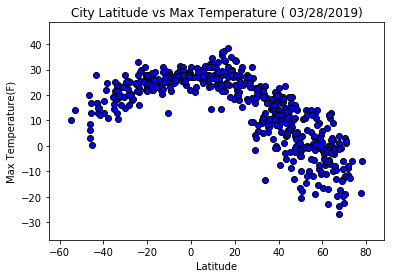

In [9]:
x_axis=weather_df['Lat']
y_axis=weather_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
xmax=max(x_axis)+10
xmin=min(x_axis)-10
ymax=max(y_axis)+10
ymin=min(y_axis)-10
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
now=datetime.datetime.now()

plt.title("City Latitude vs Max Temperature ( "+ now.strftime("%m/%d/%Y") +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
#Save Figure
plt.savefig("Images/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

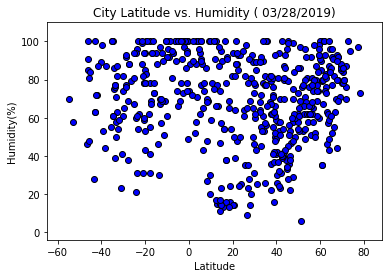

In [10]:
x_axis=weather_df['Lat']
y_axis=weather_df['Humidity']
plt.scatter(x_axis,y_axis,marker="o",facecolor="blue",edgecolor="black")
x_max=max(x_axis)+10
x_min=min(x_axis)-10
y_max=max(y_axis)+10
#y_max=100
y_min=min(y_axis)-10
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
now=datetime.datetime.now()
plt.title("City Latitude vs. Humidity ( "+ now.strftime("%m/%d/%Y") +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
#Save Figure
plt.savefig("Images/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

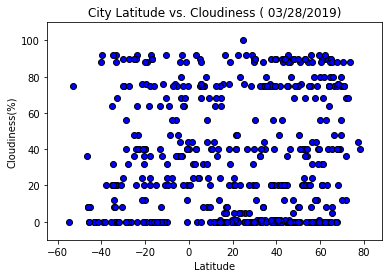

In [11]:
x_axis=weather_df['Lat']
y_axis=weather_df['Cloudiness']
plt.scatter(x_axis,y_axis,marker="o",facecolor="blue",edgecolor="black")
x_max=max(x_axis)+10
x_min=min(x_axis)-10
y_max=max(y_axis)+10
y_min=min(y_axis)-10
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
now=datetime.datetime.now()
plt.title("City Latitude vs. Cloudiness ( "+ now.strftime("%m/%d/%Y") +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
#Save Figure
plt.savefig("Images/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

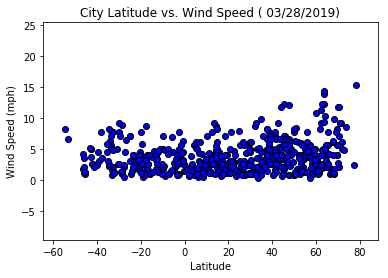

In [12]:
x=datetime.datetime.now
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind Speed"]
plt.scatter(x_axis,y_axis,marker="o",facecolor="blue",edgecolor="black")
x_max=max(x_axis)+10
x_min=min(x_axis)-10
y_max=max(y_axis)+10
y_min=min(y_axis)-10
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
now=datetime.datetime.now()
plt.title("City Latitude vs. Wind Speed ( "+ now.strftime("%m/%d/%Y") +")")
#Save Figure
plt.savefig("Images/LatVsWindSpeed.png")
plt.show()

